In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Linear algebra practice

Assign our variables.

In [2]:
a = np.array([[1], [2]])
b = np.array([[5], [6]])
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
display(a)
display(b)
display(A)
display(B)

array([[1],
       [2]])

array([[5],
       [6]])

array([[1, 2],
       [3, 4]])

array([[5, 6],
       [7, 8]])

$a \cdot b$

In [3]:
a.T @ b

array([[17]])

$b \cdot a$

In [4]:
b.T @ a

array([[17]])

$Aa$

In [5]:
A @ a

array([[ 5],
       [11]])

$Bb$

In [6]:
B @ b

array([[61],
       [83]])

AB

In [7]:
A @ B

array([[19, 22],
       [43, 50]])

BA

In [8]:
B @ A

array([[23, 34],
       [31, 46]])

$A^{-1}$

In [9]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

$AA^{-1}$

In [10]:
A @ np.linalg.inv(A)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

$B^{-1}$

In [11]:
np.linalg.inv(B)

array([[-4. ,  3. ],
       [ 3.5, -2.5]])

$BB^{-1}$

In [12]:
B @ np.linalg.inv(B)

array([[1., 0.],
       [0., 1.]])

# Toy regression problem (predict number of sounds with number of letters)

Set up the data to analyze for our toy problem

In [13]:
X = np.array([[1, 4], [1, 8], [1, 7], [1, 5]])
y = np.array([[4], [4], [5], [3]])

Get $b$ using the `numpy.linalg.pinv` function. That is, evaluate $X^+ y$.

In [14]:
Xplus = np.linalg.pinv(X)
b = Xplus @ y
display(b)

array([[2.8],
       [0.2]])

Get $b$ using the `numpy.linalg.lstsq` function, which solves the linear least square problem and minimizes the sum of squared errors. Ignore the warning that shows up (it is not relevant for our purposes).

In [15]:
b = np.linalg.lstsq(X, y)[0]
display(b)

<ipython-input-15-b00201e744d0>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(X, y)[0]


array([[2.8],
       [0.2]])

Fit the line with scikit-learn.

In [16]:
reg = LinearRegression()
mod = reg.fit(X[:,1].reshape(-1, 1), y)
b = np.array([[mod.intercept_[0]], [mod.coef_[0][0]]])
display(b)

array([[2.8],
       [0.2]])

Plot our original data and the fitted line.

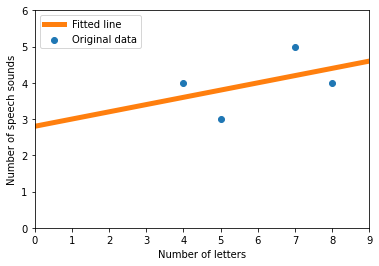

In [17]:
plt.scatter(X[:,1], y, label='Original data')
plt.xlabel('Number of letters')
plt.ylabel('Number of speech sounds')
plt.xlim((0, 9))
plt.ylim((0, 6))
line_x = np.linspace(0, 9, num=100)
x_with_ones = np.hstack((np.ones((100, 1)), line_x.reshape(-1, 1)))
line_y = x_with_ones @ b
plt.plot(line_x, line_y, color='C1', lw=5, label='Fitted line')
plt.legend(loc='upper left')

# Larger regression example (predict response latency with number of letters)

Load in our data.

In [18]:
d = np.loadtxt('experiment_data.txt')
X = d[:,0]
y = d[:,1].reshape(-1, 1)
# add the 1s column in a hacky way
X = np.vstack((np.ones(X.shape[0]), X)).T
display(X)
display(y)

array([[ 1.,  8.],
       [ 1.,  9.],
       [ 1., 14.],
       ...,
       [ 1.,  7.],
       [ 1.,  4.],
       [ 1.,  7.]])

array([[ 813.],
       [ 889.],
       [1048.],
       ...,
       [2537.],
       [ 911.],
       [ 953.]])

Perform regression by doing $X^+y$.

In [19]:
b = np.linalg.pinv(X) @ y
display(b)

array([[817.33117084],
       [ 17.68942633]])

Perform regression with `numpy.linalg.lstsq`.

In [20]:
b = np.linalg.lstsq(X, y)[0]
display(b)

<ipython-input-20-b00201e744d0>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(X, y)[0]


array([[817.33117084],
       [ 17.68942633]])

Perform regression using `sklearn.linear_model.LinearRegression`.

In [21]:
reg = LinearRegression()
mod = reg.fit(X[:,1].reshape(-1, 1), y)
b = np.array([[mod.intercept_[0]], [mod.coef_[0][0]]])
display(b)

array([[817.33117084],
       [ 17.68942633]])

Plot the regression and the original data.

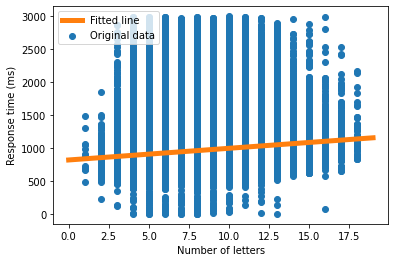

In [22]:
plt.scatter(X[:,1], y, label='Original data')
plt.xlabel('Number of letters')
plt.ylabel('Response time (ms)')
line_x = np.linspace(0, 19, num=100)
x_with_ones = np.hstack((np.ones((100, 1)), line_x.reshape(-1, 1)))
line_y = x_with_ones @ b
plt.plot(line_x, line_y, lw=5, color='C1', label='Fitted line')
plt.legend(loc='upper left')